# Reading data from CSV file
The S&P stock data source is downloaded from here:
https://www.kaggle.com/camnugent/sandp500

In [1]:
import pandas as pd
allData = pd.read_csv('Data//all_stocks_5yr.csv')
allData['date'] = pd.to_datetime(allData['date'])
allData.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


# Filtering the data for Apple stock price

In [2]:
appleData = allData[allData['Name'] == 'AAPL']
appleData = appleData.reset_index(drop=True)
appleData.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# Plotting the closing price

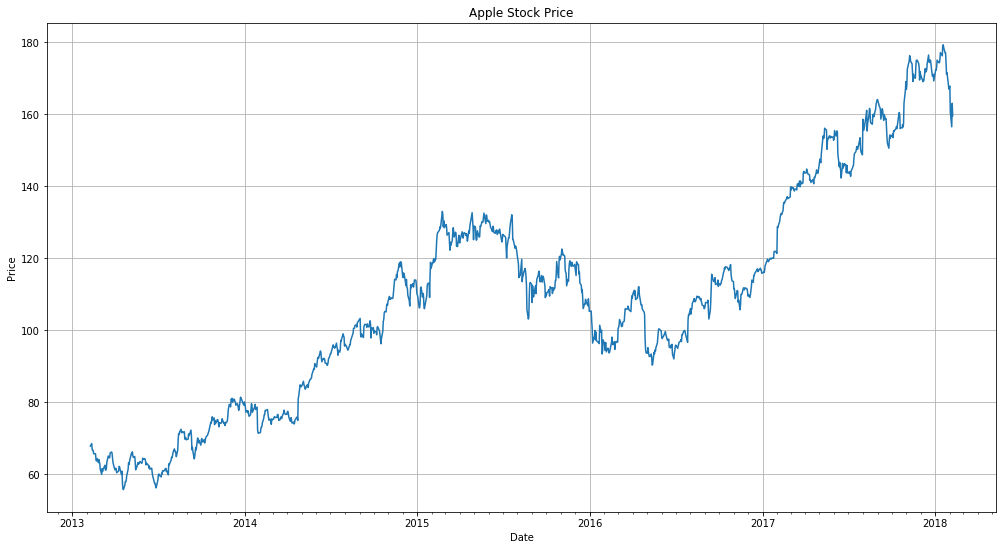

In [19]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(17,9))
ax.plot(appleData['date'], appleData['close'])

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.grid(True)

#fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

# Data from 2017

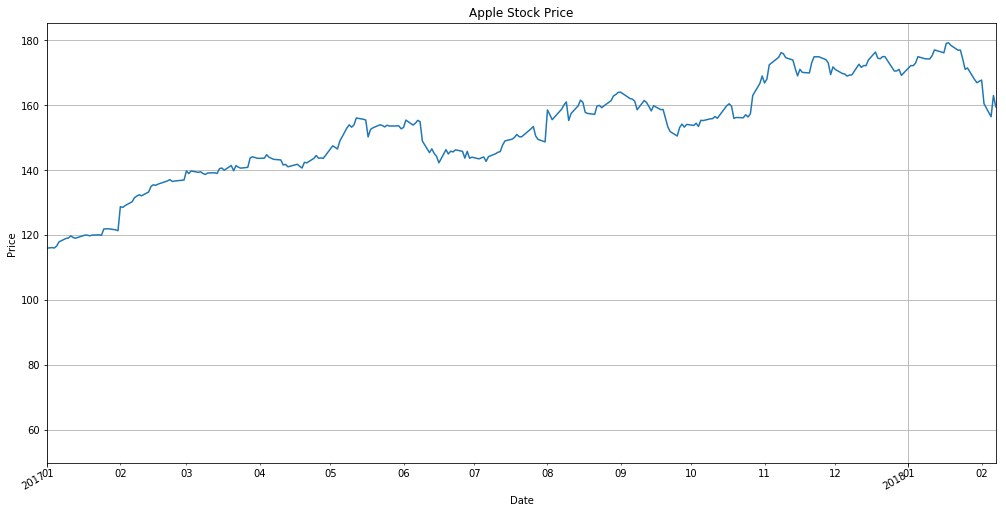

In [167]:
datemin = datetime.date(2017, 1, 1)
datemax = appleData['date'].max()

fig, ax = plt.subplots(figsize=(17,9))
ax.plot(appleData['date'], appleData['close'])

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))


ax.set_xlim(datemin, appleData['date'].max())

ax.grid(True)

fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

# Simple Moving Average (SMA)

In [69]:
def simple_moving_average(series, n = 3) :
    cumsum, moving_aves = [0], []
    for i, x in enumerate(series, 1):
        cumsum.append(cumsum[i-1] + x)
        if i >= n:
            moving_ave = (cumsum[i] - cumsum[i-n]) / n
        else:
            moving_ave = None #seri[i-1]
        moving_aves.append(moving_ave)
        
    return moving_aves

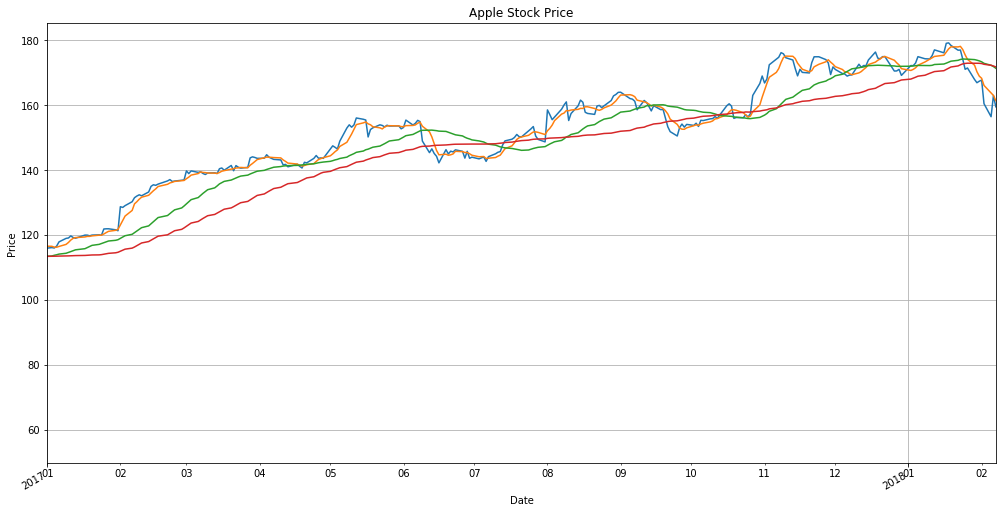

In [29]:
fig, ax = plt.subplots(figsize=(17,9))
ax.plot(appleData['date'], appleData['close'])
ax.plot(appleData['date'], simple_moving_average(appleData['close'], 5))
ax.plot(appleData['date'], simple_moving_average(appleData['close'], 30))
ax.plot(appleData['date'], simple_moving_average(appleData['close'], 60))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

ax.set_xlim(datemin, appleData['date'].max())

ax.grid(True)

fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

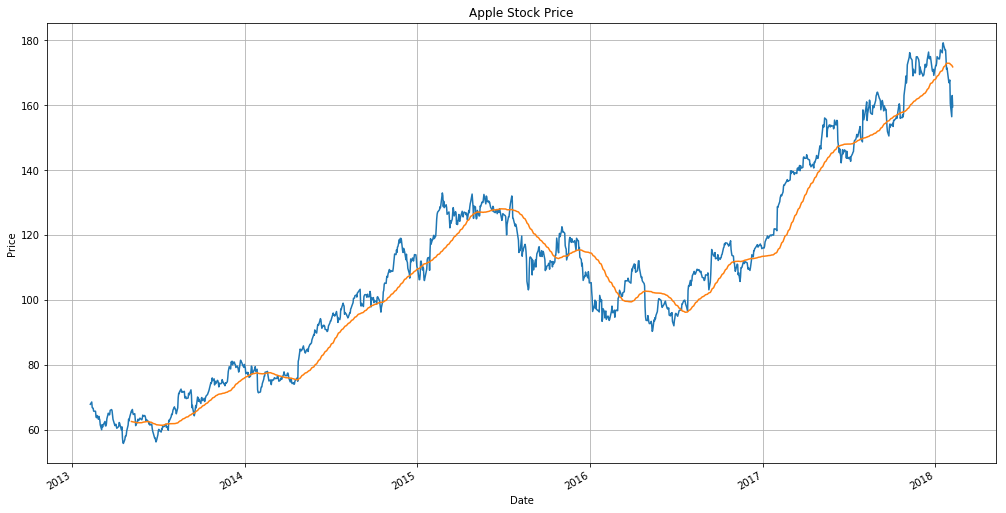

In [30]:
fig, ax = plt.subplots(figsize=(17,9))
ax.plot(appleData['date'], appleData['close'])
ax.plot(appleData['date'], simple_moving_average(appleData['close'], 60))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.grid(True)

fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

# Weighted Moving Average

In [98]:
def weighted_moving_average(series, weights):
    n = len(weights)
    weighted_moving_aves = []
    for i in range(len(series)):
        if i >= n - 1:
            data = series[i - n + 1:i + 1]            
            weighted_moving_aves.append(np.dot(data, weights))
        else:
            weighted_moving_aves.append(None)
        
    return weighted_moving_aves

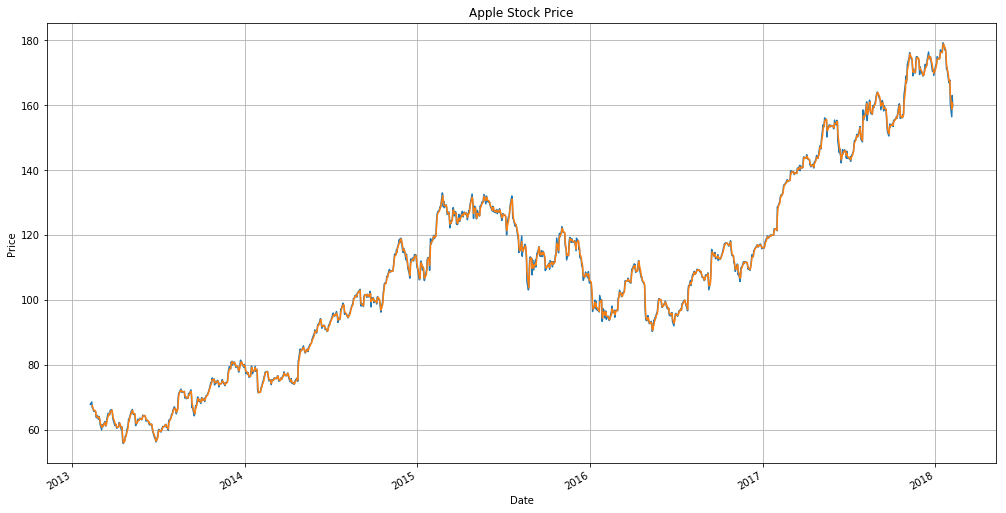

In [99]:
fig, ax = plt.subplots(figsize=(17,9))
ax.plot(appleData['date'], appleData['close'])
ax.plot(appleData['date'], weighted_moving_average(appleData['close'], [0.1,0.3,0.6]))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.grid(True)

fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

# Single Exponential Smoothing (SES)

In [105]:
def simple_exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

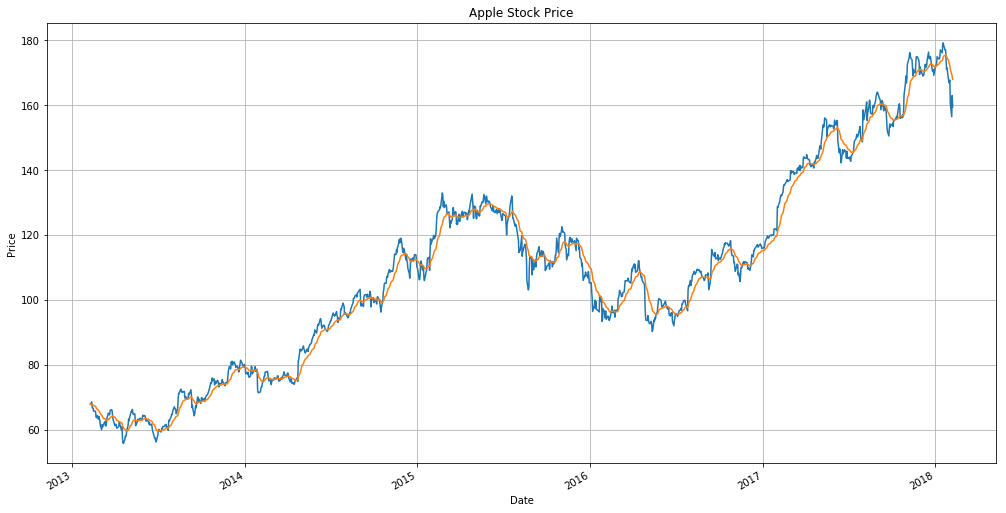

In [104]:
fig, ax = plt.subplots(figsize=(17,9))
ax.plot(appleData['date'], appleData['close'])
ax.plot(appleData['date'], simple_exponential_smoothing(appleData['close'], 0.1))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.grid(True)

fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

# Double Exponential Smoothing (DES)

In [146]:
def double_exponential_smoothing(series, alpha, beta):
    """
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series) + 1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

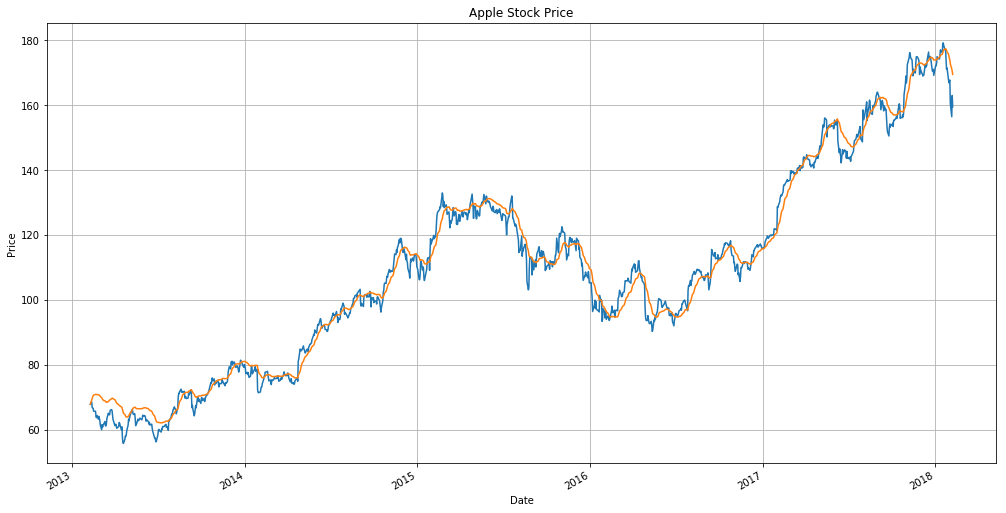

In [151]:
fig, ax = plt.subplots(figsize=(17,9))
ax.plot(appleData['date'], appleData['close'])
ax.plot(appleData['date'], double_exponential_smoothing(appleData['close'], 0.1, 0.01)[:-1])

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.grid(True)

fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

# Triple exponential smoothing a.k.a. Holt-Winters

In [153]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [157]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize              # for function minimization

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))


In [158]:
%%time
data = appleData['close'][:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

0.32781467729034375 0.029997448882362276 1.0
Wall time: 6.02 s
